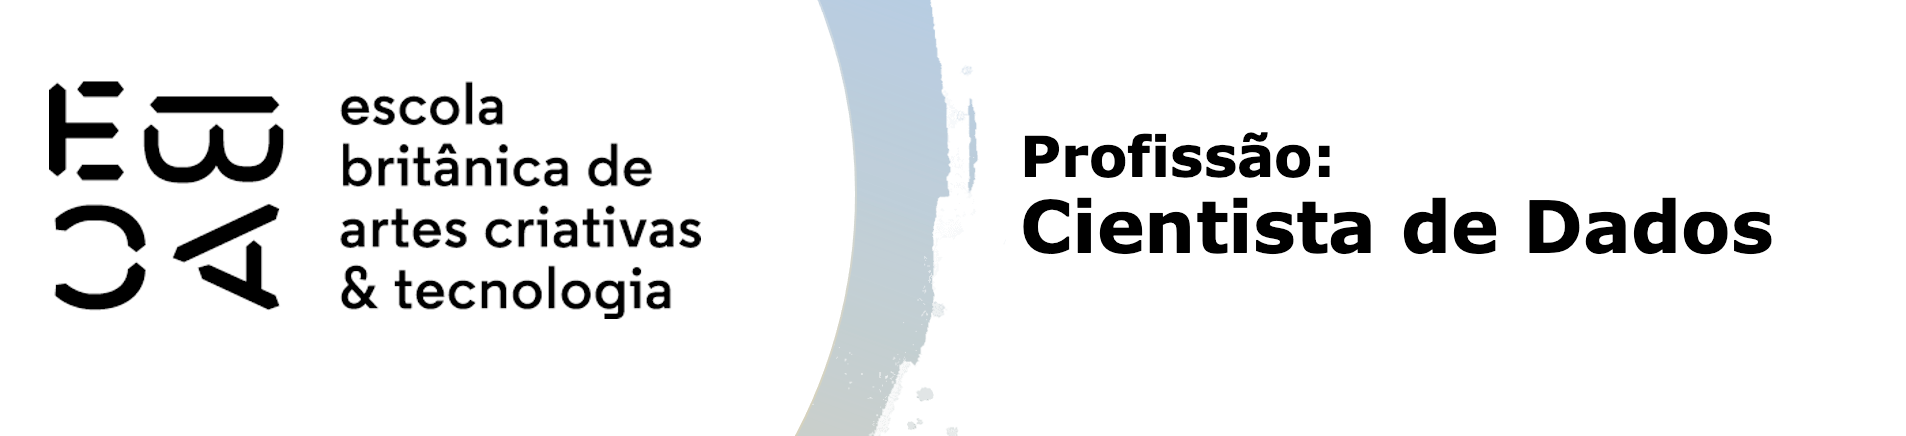

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [73]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

In [76]:
df2 = df[df['Data Registro'] >= '2020-01-01'].copy()
df2

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [79]:
tab = df2[['categoria', 'flag_credito']].groupby('categoria').mean().reset_index()
tab.columns = ['Categoria','Média flag crédito']
tab

,Categoria,Média flag crédito
0,Alimentos,0.682079
1,Auto posto,0.250000
2,Construção,0.469215
3,Farmácia,0.351926
4,Mercado,0.478393
5,Restaurantes,0.747489
6,Varejo,0.138801
7,Vestuário,0.230729
8,não definido,0.364556


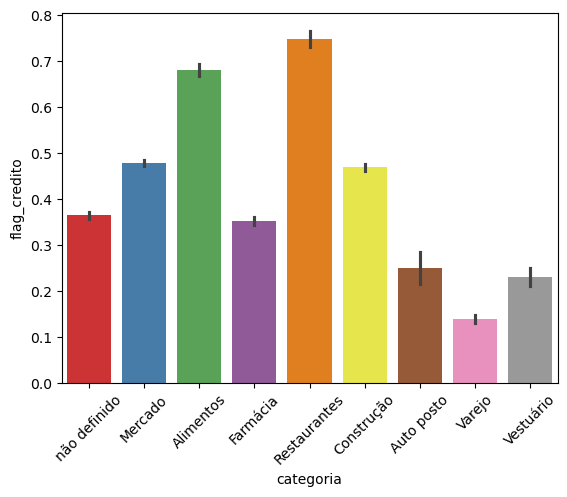

In [80]:
sns.barplot(x='categoria', y='flag_credito', data=df2, palette='Set1')
plt.xticks(rotation=45)
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [83]:
tab = pd.crosstab(df2.categoria, df2.flag_credito, margins=True, margins_name='total')
tab

flag_credito,0,1,total
categoria,,,
Alimentos,1609,3452,5061
Auto posto,405,135,540
Construção,8526,7537,16063
Farmácia,6611,3590,10201
Mercado,14388,13196,27584
Restaurantes,553,1637,2190
Varejo,4368,704,5072
Vestuário,1477,443,1920
não definido,11743,6737,18480


In [84]:
rótulo_evento = tab.columns[1]
rótulo_nao_evento = tab.columns[0]

tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
tab

flag_credito,0,1,total,pct_evento,pct_nao_evento,woe
categoria,,,,,,
Alimentos,1609,3452,5061,0.092223,0.032387,1.046444
Auto posto,405,135,540,0.003607,0.008152,-0.815509
Construção,8526,7537,16063,0.201357,0.171618,0.159807
Farmácia,6611,3590,10201,0.095910,0.133072,-0.327480
Mercado,14388,13196,27584,0.352542,0.289614,0.196622
Restaurantes,553,1637,2190,0.043734,0.011131,1.368366
Varejo,4368,704,5072,0.018808,0.087923,-1.542179
Vestuário,1477,443,1920,0.011835,0.029730,-0.921095
não definido,11743,6737,18480,0.179985,0.236373,-0.272539


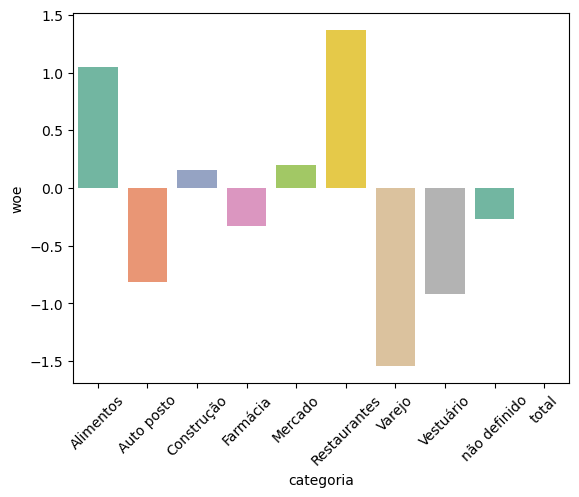

In [85]:
sns.barplot(x='categoria', y='woe', data=tab, palette='Set2')
plt.xticks(rotation=45)
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [88]:
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
tab

flag_credito,0,1,total,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,
Alimentos,1609,3452,5061,0.092223,0.032387,1.046444,0.062615
Auto posto,405,135,540,0.003607,0.008152,-0.815509,0.003707
Construção,8526,7537,16063,0.201357,0.171618,0.159807,0.004752
Farmácia,6611,3590,10201,0.095910,0.133072,-0.327480,0.012170
Mercado,14388,13196,27584,0.352542,0.289614,0.196622,0.012373
Restaurantes,553,1637,2190,0.043734,0.011131,1.368366,0.044612
Varejo,4368,704,5072,0.018808,0.087923,-1.542179,0.106587
Vestuário,1477,443,1920,0.011835,0.029730,-0.921095,0.016483
não definido,11743,6737,18480,0.179985,0.236373,-0.272539,0.015368


In [65]:
iv = tab['iv_parcial'].sum()
iv

0.2786678082561656

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
   <strong>Resposta:</strong> <br>
    Um valor positivo de woe indica que a variável em questão está associada a um aumento na probabilidade do evento ocorrer o seria o caso das variáveis Alimentos com 1,046 e dá Restaurante com 1,368, enquanto um valor negativo sugere uma diminuição dessa probabilidade o seria o caso das variáveis Vestuário com -0,921 e dá Varejo com -1,542. O Information Value possui um poder preditivo 0,279 o que é considerado médio  
</div>